In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt

# 데이터 정보
- 한국 복지 패널 데이터
 - 한국 보건사회연구원에서 우리나라 가구의 경제활동을 연구해 복지 정책을 반영할 목적으로 발간한 자료
 - 전국 7천여 가구를 선정해서 2006년도 2019년도까지 조사한 자료

In [2]:
welfare = pd.read_csv('data/welfare.csv')
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2,1945,2,1,NaN,NaN,1
1,1,1948,2,2,NaN,NaN,1
2,1,1942,3,1,107.0,762.0,1
3,1,1962,1,1,192.0,855.0,1
4,2,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,2,1967,1,1,NaN,NaN,5
14414,2,1992,5,1,NaN,NaN,5
14415,1,1995,5,1,NaN,910.0,5
14416,2,1998,5,1,200.0,246.0,5


In [3]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       14418 non-null  int64  
 1   birth        14418 non-null  int64  
 2   marriage     14418 non-null  int64  
 3   religion     14418 non-null  int64  
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  14418 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 788.6 KB


In [4]:
# 결측치의 개수 확인하기 - isnull() 함수
welfare.isnull() # 데이터 NaN인 경우 True, 아니면 False

welfare.isnull().sum() # True값들만 더해줌

gender            0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

In [5]:
# copy()함수 사용해서 데이터 복사
welfare_copy = welfare.copy()

# gender 컬럼에 이상치가 있는지 확인

In [6]:
welfare_copy['gender'].value_counts()

# 1 - man 2 - woman

gender
2    7913
1    6505
Name: count, dtype: int64

### 데이터 전처리
#### 결측치, 이상치, 컬럼이나 인덱스 변수 변경

In [7]:
# 1은 male 2 female으로 바꿔보기
## 조건에 맞춰 데이터를 변경 하는 함수 2개 있었습니다

# 1. np.where()
# 2. apply()

# np.where 사용해서 데이터 바꾸겠습니다!

welfare_copy['gender'] = np.where(welfare_copy['gender'] == 1, 'male', 'female')
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,1,NaN,NaN,1
1,male,1948,2,2,NaN,NaN,1
2,male,1942,3,1,107.0,762.0,1
3,male,1962,1,1,192.0,855.0,1
4,female,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,1,NaN,NaN,5
14414,female,1992,5,1,NaN,NaN,5
14415,male,1995,5,1,NaN,910.0,5
14416,female,1998,5,1,200.0,246.0,5


In [8]:
welfare_copy['gender'].value_counts()

gender
female    7913
male      6505
Name: count, dtype: int64

In [9]:
# 결측치 확인하는 방법
# isna() vs isnull() 차이
# 없습니다.

welfare_copy['gender'].isna().sum()

0

<Axes: xlabel='gender', ylabel='count'>

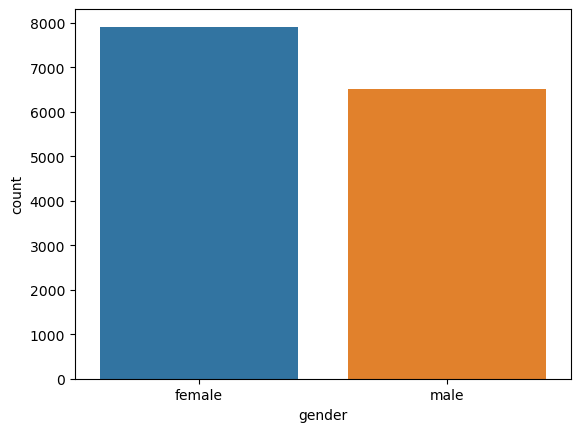

In [10]:
# countplot으로 그래프 그려보기
sns.countplot(data = welfare_copy, x = 'gender')

# 1. 종교 여부가 결혼에 영향이 있을까?

## religion 컬럼
 - 1 : 있음
 - 2 : 없음
 
 - 데이터를 1이면 yes 2면 no로 바꿔주신 후 countplot 그래프 그리기

In [11]:
welfare_copy['religion'].value_counts()

religion
2    7815
1    6603
Name: count, dtype: int64

In [12]:
welfare_copy['religion'] = np.where(welfare_copy['religion'] == 1, 'yes', 'no')
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,yes,NaN,NaN,1
1,male,1948,2,no,NaN,NaN,1
2,male,1942,3,yes,107.0,762.0,1
3,male,1962,1,yes,192.0,855.0,1
4,female,1963,1,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,yes,NaN,NaN,5
14414,female,1992,5,yes,NaN,NaN,5
14415,male,1995,5,yes,NaN,910.0,5
14416,female,1998,5,yes,200.0,246.0,5


<Axes: xlabel='religion', ylabel='count'>

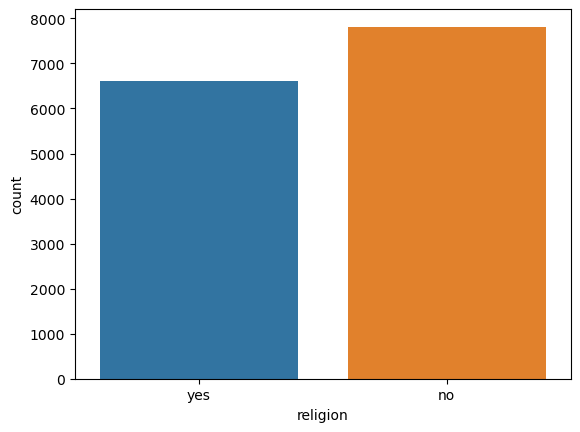

In [13]:
sns.countplot(data = welfare_copy, x = 'religion')

In [14]:
# marriage 컬럼 데이터 확인
welfare_copy['marriage'].value_counts()

marriage
1    7190
5    2357
0    2121
2    1954
3     689
4      78
6      29
Name: count, dtype: int64

In [15]:
# 결측치 확인
welfare_copy['marriage'].isna().sum()

0

# marraige 컬럼 데이터 정보
 - 0 : 미해당 (18세 미만)
 - 1 : 결혼
 - 2 : 사별
 - 3 : 이혼
 - 4 : 별거
 - 5 : 미혼
 - 6 : 기타

# 1 - marriage

# 3 - divorce

# 5 - not marriage

# 0,2,4,6 - etc

#### 실습) apply 활용해서 바꾸어 주기!

In [16]:
# welfare_copy['marriage'] = welfare_copy['marriage'].apply(lambda x: 'marriage' if x == 1 else ('divorce' if x == 3 else ('not marriage' if x == 5 else 'etc')))
# welfare_copy

In [17]:
# sns.countplot(data = welfare_copy, x = 'marriage')

In [18]:
def getMarriage(row):
    marriage = row['marriage']
    if marriage == 1:
        return 'marriage'
    elif marriage == 3:
        return 'divorce'
    elif marriage == 5:
        return 'not marriage'
    else:
        return 'etc'
    
welfare_copy['marriage'] = welfare_copy.apply(getMarriage, axis = 1)
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [19]:
welfare_copy['marriage'].value_counts()

marriage
marriage        7190
etc             4182
not marriage    2357
divorce          689
Name: count, dtype: int64

<Axes: xlabel='marriage', ylabel='count'>

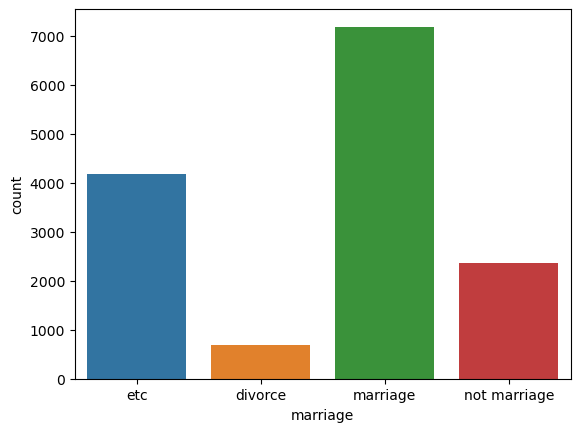

In [20]:
sns.countplot(data = welfare_copy, x = 'marriage')

# 종교유무에 따라 결혼/ 이혼율 구하기

In [21]:
# 결혼 했는지 이혼했는지 의 데이터
# 불리언 인덱싱
welfare_copy.query('marriage == "marriage"')

,gender,birth,marriage,religion,income,code_job,code_region
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
6,male,1927,marriage,yes,NaN,NaN,1
7,female,1934,marriage,yes,27.0,941.0,1
11,male,1940,marriage,no,NaN,NaN,1
...,...,...,...,...,...,...,...
14408,female,1936,marriage,no,NaN,611.0,6
14410,male,1956,marriage,yes,200.0,854.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5


In [22]:
# 이혼 여부
welfare_copy.query('marriage == "divorce"')

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942,divorce,yes,107.0,762.0,1
9,female,1970,divorce,yes,NaN,NaN,1
32,female,1961,divorce,yes,NaN,951.0,1
44,female,1954,divorce,no,250.0,421.0,1
57,female,1937,divorce,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14337,male,1956,divorce,no,NaN,NaN,6
14343,male,1952,divorce,yes,NaN,NaN,6
14372,male,1963,divorce,yes,NaN,NaN,1
14373,male,1950,divorce,yes,NaN,NaN,5


In [23]:
# 결혼 한 사람들의 종교 유무 파악
welfare_copy.query('marriage == "marriage"').groupby('religion').size().reset_index(name='cnt')

,religion,cnt
0,no,3660
1,yes,3530


#### 결혼 여부가 종교의 유무와는 큰 상관이 없다

# 퍼센테이지로 나타내기

In [24]:
wel_marr = welfare_copy.query("marriage == 'marriage' or marriage == 'divorce'")

In [25]:
wel_marr.groupby('religion').agg(cnt = ('religion', 'count'))

,cnt
religion,
no,4044
yes,3835


In [26]:
wel_per = wel_marr.groupby('religion', as_index = False)['marriage'].value_counts(normalize = True)

In [27]:
wel_per['proportion'] = wel_per['proportion'] * 100
wel_per

,religion,marriage,proportion
0,no,marriage,90.504451
1,no,divorce,9.495549
2,yes,marriage,92.046936
3,yes,divorce,7.953064


<Axes: xlabel='religion', ylabel='proportion'>

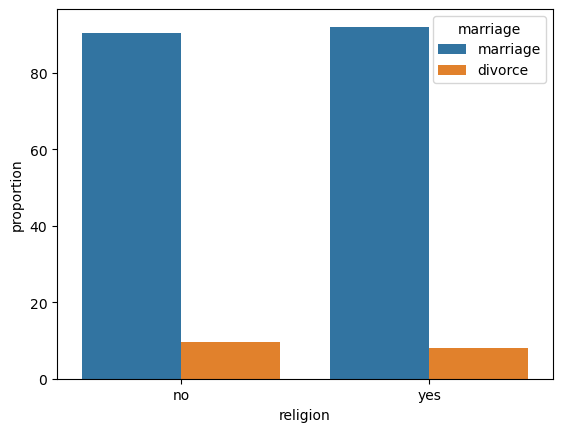

In [28]:
sns.barplot(data = wel_per, x = 'religion', y = 'proportion', hue = 'marriage')

# 종교와 이혼은 크게 관련이 없다

# 성별 별 수입 확인

In [29]:
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [30]:
welfare_copy['income'].isna().sum()

9884

In [31]:
welfare_copy['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [32]:
# 이상치 발견
# min값이 왜 0일까?
# query함수로 income == 0
welfare_copy.query('income == 0')

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


### encoding = 무언가를 코드화 한다는 뜻

 - 한국말이 있는 경우 encoding을 진행
 - euc-kr, utf-8

In [33]:
job_code = pd.read_csv('data/job_code.csv', encoding='euc-kr')

In [34]:
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [35]:
job_code.query("code_job == 252 | code_job == 243 | code_job == 311 | code_job == 313 |code_job == 320")

,code_job,job
35,243,간호사
42,252,학교 교사
60,311,행정 사무원
62,313,회계 및 경리 사무원
64,320,금융 사무 종사자


In [36]:
welfare_copy.query('income == 0')
# 해당 7개의 데이터는 실제로 이상치입니다

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


### 이상치를 해결하기 위한 방법
 - 해당 직군의 수입 알아보기
 
## 데이터 오류 해결 방법 2가지
 - 1. 데이터 버리기 (주로 삭제해도 무방할때)
 - 2. 데이터 채워주기
  - 평균값과 "중간값"의 차이

In [37]:
welfare_copy.query('code_job == 243')

,gender,birth,marriage,religion,income,code_job,code_region
144,female,1989,not marriage,no,208.0,243.0,1
250,female,1990,not marriage,yes,248.0,243.0,2
356,female,1978,marriage,yes,658.0,243.0,1
708,female,1987,marriage,no,305.0,243.0,2
929,female,1956,marriage,yes,258.0,243.0,1
...,...,...,...,...,...,...,...
12764,female,1996,not marriage,no,160.0,243.0,7
12863,female,1983,not marriage,no,436.0,243.0,2
13113,female,1962,not marriage,no,416.0,243.0,7
13391,female,1983,not marriage,no,258.0,243.0,3


In [38]:
welfare_copy['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [39]:
# code_job == NaN 값인데 수입이 있는 사람
welfare_copy.query('code_job.isna() and income.notna()')
# 다행히 없습니다

,gender,birth,marriage,religion,income,code_job,code_region


In [40]:
# income nan값인사람
# 이상치 7명 존재
# 결측치 + 이상치 9891개
welfare_copy['income'].isna().sum()

9884

In [41]:
welfare_copy.query('code_job.notna() and income.isna()')

,gender,birth,marriage,religion,income,code_job,code_region
22,male,1975,not marriage,yes,NaN,521.0,1
23,male,1978,marriage,no,NaN,151.0,1
24,female,1982,marriage,no,NaN,521.0,1
32,female,1961,divorce,yes,NaN,951.0,1
33,female,1982,marriage,no,NaN,531.0,1
...,...,...,...,...,...,...,...
14399,male,1941,marriage,no,NaN,611.0,6
14408,female,1936,marriage,no,NaN,611.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5


In [42]:
# income == NaN, code_job == NaN 인 값들 drop()
# drop(인덱스, axis = 0)

drop_index = welfare_copy[(welfare_copy['income'].isna()) & (welfare_copy['code_job'].isna())].index
welfare_drop = welfare_copy.drop(drop_index)
welfare_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6878 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       6878 non-null   object 
 1   birth        6878 non-null   int64  
 2   marriage     6878 non-null   object 
 3   religion     6878 non-null   object 
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  6878 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 429.9+ KB


In [43]:
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
7,female,1934,marriage,yes,27.0,941.0,1
8,female,1940,etc,yes,27.0,999.0,2
14,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
14410,male,1956,marriage,yes,200.0,854.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5
14415,male,1995,not marriage,yes,NaN,910.0,5


In [44]:
# 인덱스 정리
welfare_drop.index = range(1, len(welfare_drop) + 1)
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942,divorce,yes,107.0,762.0,1
2,male,1962,marriage,yes,192.0,855.0,1
3,female,1934,marriage,yes,27.0,941.0,1
4,female,1940,etc,yes,27.0,999.0,2
5,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6874,male,1956,marriage,yes,200.0,854.0,6
6875,female,1958,marriage,yes,NaN,611.0,6
6876,male,1967,marriage,yes,NaN,874.0,5
6877,male,1995,not marriage,yes,NaN,910.0,5


In [45]:
code_median = welfare_drop[['code_job', 'income']].groupby('code_job').median()
code_median

,income
code_job,
111.0,461.0
112.0,465.0
121.0,754.0
122.0,467.5
131.0,566.5
...,...
992.0,183.0
999.0,27.0
1001.0,572.0


In [46]:
code_median.isna().sum()

income    3
dtype: int64

In [47]:
code_median.query('income.isna()')

,income
code_job,
423.0,NaN
613.0,NaN
823.0,NaN


In [48]:
# 복잡
code_median.loc[welfare_drop['code_job']].values

array([[303. ],
       [251.5],
       [ 60. ],
       ...,
       [338.5],
       [260. ],
       [200. ]])

In [49]:
# 결측치 채우기
def fill_income(row):
    # 수입 값이 결측치 일때 
    if np.isnan(row['income']):
        return code_median.loc[row['code_job']].values[0]
    # 수입 값이 결측치 아닐 때
    else:
        return row['income']

In [50]:
welfare_drop['income'] = welfare_drop.apply(fill_income, axis = 1)
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942,divorce,yes,107.0,762.0,1
2,male,1962,marriage,yes,192.0,855.0,1
3,female,1934,marriage,yes,27.0,941.0,1
4,female,1940,etc,yes,27.0,999.0,2
5,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6874,male,1956,marriage,yes,200.0,854.0,6
6875,female,1958,marriage,yes,218.0,611.0,6
6876,male,1967,marriage,yes,338.5,874.0,5
6877,male,1995,not marriage,yes,260.0,910.0,5


In [51]:
welfare_drop.query('income.isna()')

,gender,birth,marriage,religion,income,code_job,code_region
239,male,1966,marriage,no,NaN,823.0,1
240,female,1966,marriage,no,NaN,823.0,1
713,male,1947,marriage,no,NaN,823.0,1
714,female,1949,marriage,no,NaN,823.0,1
718,male,1957,marriage,no,NaN,823.0,1
719,female,1963,marriage,no,NaN,823.0,1
769,male,1975,marriage,no,NaN,823.0,1
1034,male,1959,marriage,yes,NaN,823.0,3
1066,male,1938,marriage,yes,NaN,823.0,3
1342,male,1936,etc,no,NaN,613.0,4


In [52]:
welfare_drop = welfare_drop.dropna(subset = ['income'])
welfare_drop.query('income.isna()')

,gender,birth,marriage,religion,income,code_job,code_region


In [53]:
# income이 nan값 삭제
welfare_drop

,gender,birth,marriage,religion,income,code_job,code_region
1,male,1942,divorce,yes,107.0,762.0,1
2,male,1962,marriage,yes,192.0,855.0,1
3,female,1934,marriage,yes,27.0,941.0,1
4,female,1940,etc,yes,27.0,999.0,2
5,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6874,male,1956,marriage,yes,200.0,854.0,6
6875,female,1958,marriage,yes,218.0,611.0,6
6876,male,1967,marriage,yes,338.5,874.0,5
6877,male,1995,not marriage,yes,260.0,910.0,5


In [54]:
# 성별로 묶어 보기
gender_income = welfare_drop.groupby('gender', as_index = False).agg(income_mean = ('income', 'mean'))

In [55]:
gender_income

,gender,income_mean
0,female,189.871704
1,male,311.430076


<Axes: xlabel='gender', ylabel='income_mean'>

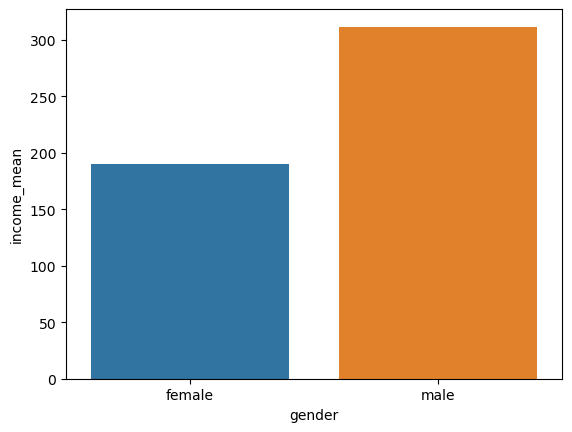

In [56]:
sns.barplot(data = gender_income, x ='gender', y = 'income_mean')

# 실제로 남성이 여성보다 평균 임금이 높습니다

#### 결측치 버렸을 때 위 값이랑 차이가 있는지

In [57]:
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [58]:
welfare_copy['income'].isna().sum()

9884

In [59]:
# 값이 0인 7개의 데이터
welfare_copy.query('income == 0')

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


In [60]:
# 1. 7개의 데이터를 NaN 값으로 바꾸고
# 2. NaN값 모두 버리기
welfare_drop2 = welfare_copy.copy()

In [61]:
welfare_drop2

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [62]:
welfare_drop2['income'] = np.where(welfare_drop2['income'] == 0, np.nan, welfare_drop2['income'])
welfare_drop2['income'].isna().sum()

9891

In [63]:
# 결측치 제거 - dropna 사용 해서 모두 제거
welfare_drop2 = welfare_drop2.dropna(subset = ['income'])
welfare_drop2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4527 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       4527 non-null   object 
 1   birth        4527 non-null   int64  
 2   marriage     4527 non-null   object 
 3   religion     4527 non-null   object 
 4   income       4527 non-null   float64
 5   code_job     4527 non-null   float64
 6   code_region  4527 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 282.9+ KB


In [64]:
welfare_drop2.groupby('gender').agg(income_mean = ('income', 'mean'))

,income_mean
gender,
female,186.875782
male,349.037571


In [65]:
# 결측치를 채운 데이터
gender_income

,gender,income_mean
0,female,189.871704
1,male,311.430076


# sns lineplot 예제

In [66]:
# economics 데이터
# 출처 : kaggle사이트
#개인소비지출(Personal Consumption Expenditure, PCE) 물가지수
#pop - total population, in thousands 인구수
#psavert - personal savings rate 개인저축률
#uempmed - median duration of unemployment, in weeks 평균 실업 기간
#unemploy - number of unemployed in thousands 실업자수 

In [67]:
economics = pd.read_csv('data/economics.csv')
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


In [68]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


# 연도별 실업률 알아보기

<Axes: xlabel='date', ylabel='unemploy'>

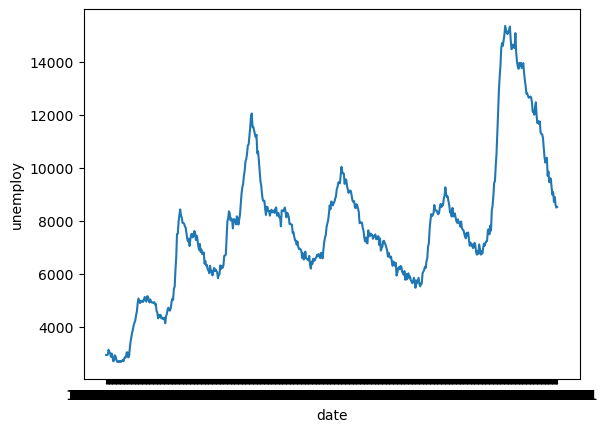

In [69]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

# 데이터 전처리 : 연도별로 묶기

In [70]:
# pd.to_datetime() : date타입으로 변환해주는 함수

# 파생변수 만들어서 컬럼으로 붙혀주기
economics['update_date'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         574 non-null    object        
 1   pce          574 non-null    float64       
 2   pop          574 non-null    float64       
 3   psavert      574 non-null    float64       
 4   uempmed      574 non-null    float64       
 5   unemploy     574 non-null    int64         
 6   update_date  574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [71]:
# date time 사용시 편한점!
# 변수 year, month, day 출력가능

# year 출력
economics['update_date'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: update_date, Length: 574, dtype: int32

In [72]:
# month
economics['update_date'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: update_date, Length: 574, dtype: int32

In [73]:
# day
economics['update_date'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: update_date, Length: 574, dtype: int32

In [74]:
# 파생변수 만들어서 컬럼 추가
economics['year'] = economics['update_date'].dt.year
economics

,date,pce,pop,psavert,uempmed,unemploy,update_date,year
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967-11-01,1967
...,...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014-12-01,2014
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015-01-01,2015
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015-02-01,2015
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015-03-01,2015


<Axes: xlabel='year', ylabel='unemploy'>

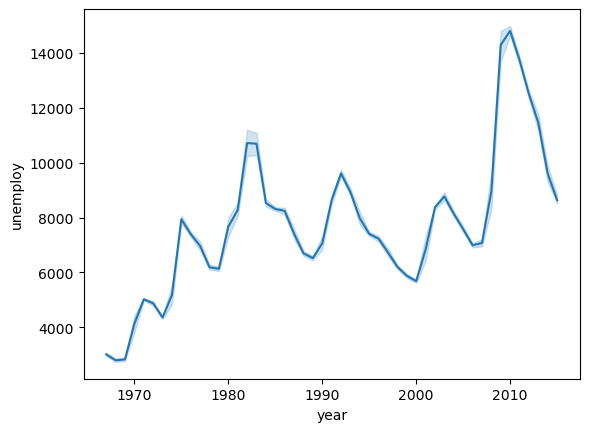

In [75]:
sns.lineplot(data = economics, x = 'year', y ='unemploy')

# ====================================

# 연령대 대비 수입

In [76]:
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


# 파생변수 만들기
 - birth컬럼 이용해서 나이 알아보기

In [77]:
welfare_copy['birth']

0        1945
1        1948
2        1942
3        1962
4        1963
         ... 
14413    1967
14414    1992
14415    1995
14416    1998
14417    2001
Name: birth, Length: 14418, dtype: int64

In [78]:
# 결측치 여부 확인
welfare_copy['birth'].isna().sum()

0

In [79]:
# age 컬럼 추가
welfare_age = welfare_copy.copy()

In [80]:
welfare_age

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [81]:
# age 컬럼 추가
welfare_age['age'] = 2019 - welfare_age['birth']
welfare_age

,gender,birth,marriage,religion,income,code_job,code_region,age
0,female,1945,etc,yes,NaN,NaN,1,74
1,male,1948,etc,no,NaN,NaN,1,71
2,male,1942,divorce,yes,107.0,762.0,1,77
3,male,1962,marriage,yes,192.0,855.0,1,57
4,female,1963,marriage,yes,NaN,NaN,1,56
...,...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5,52
14414,female,1992,not marriage,yes,NaN,NaN,5,27
14415,male,1995,not marriage,yes,NaN,910.0,5,24
14416,female,1998,not marriage,yes,200.0,246.0,5,21


In [82]:
# 요약 통계
welfare_age['age'].describe()

count    14418.000000
mean        49.719795
std         24.402250
min          1.000000
25%         29.000000
50%         51.000000
75%         71.000000
max        112.000000
Name: age, dtype: float64

In [83]:
# 이상치 발견 - 1이라는 최솟값
# 이상치? 인지 아닌지 애매한 112 최댓값

In [84]:
# 해당 나이의 수입을 알아보기
# age묶어 주기
age_income = welfare_age.groupby('age', as_index = False).agg(income_mean = ('income', 'mean'))
age_income

,age,income_mean
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
97,98,NaN
98,99,NaN
99,100,NaN
100,102,NaN


In [85]:
# income_mean이 NaN값 찾기
age_income.query('income_mean.isna()')

,age,income_mean
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [86]:
# 이상치 - drop
age_income = age_income.dropna(subset=['income_mean'])
age_income

,age,income_mean
17,18,162.000000
18,19,121.333333
19,20,136.400000
20,21,123.666667
21,22,179.676471
...,...,...
86,87,27.000000
87,88,27.000000
88,89,27.000000
89,90,20.000000


<Axes: xlabel='age', ylabel='income_mean'>

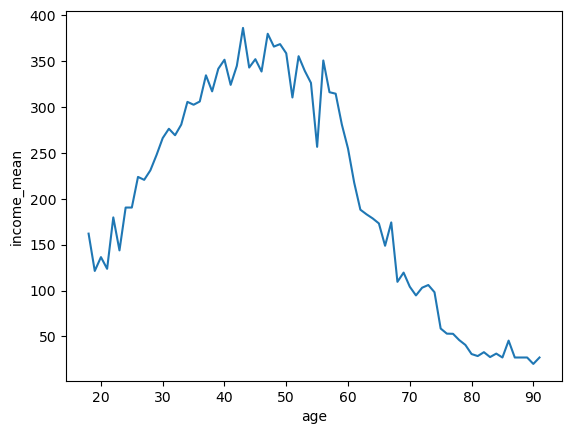

In [87]:
sns.lineplot(data = age_income, x = 'age', y = 'income_mean')

# 알 수 있는 정보
 - 수업은 40 ~ 50대가 가장 많다
 - 60대 들어서면서 수입이 급감한다

# 실습) 나이 및 성별 월급 차 확인해보기

In [88]:
a_income = welfare_age.groupby(['age', 'gender'], as_index = False).agg(income_mean = ('income', 'mean'))
a_income

,age,gender,income_mean
0,1,female,NaN
1,1,male,NaN
2,2,female,NaN
3,2,male,NaN
4,3,female,NaN
...,...,...,...
195,99,female,NaN
196,100,female,NaN
197,100,male,NaN
198,102,male,NaN


In [89]:
a_income.query('income_mean.isna()')

,age,gender,income_mean
0,1,female,NaN
1,1,male,NaN
2,2,female,NaN
3,2,male,NaN
4,3,female,NaN
5,3,male,NaN
6,4,female,NaN
7,4,male,NaN
8,5,female,NaN
9,5,male,NaN


In [90]:
a_income = a_income.dropna(subset=['income_mean'])
a_income

,age,gender,income_mean
35,18,male,162.000000
36,19,female,87.666667
37,19,male,155.000000
38,20,female,124.000000
39,20,male,186.000000
...,...,...,...
175,88,male,27.000000
176,89,female,27.000000
178,90,female,27.000000
179,90,male,13.000000


<Axes: xlabel='age', ylabel='income_mean'>

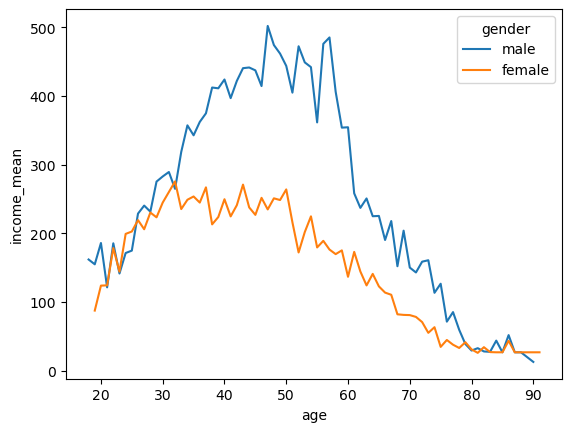

In [91]:
sns.lineplot(data = a_income, x = 'age', y = 'income_mean', hue='gender')

# 데이터 결합

In [92]:
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [93]:
welfare_copy

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [94]:
# 가로로 병합 (merge)
# 
welfare_job = pd.merge(welfare_copy, job_code, how = 'left', on = 'code_job')
# == welfare _copy.merge(job_code, how = 'left')
welfare_job

,gender,birth,marriage,religion,income,code_job,code_region,job
0,female,1945,etc,yes,NaN,NaN,1,NaN
1,male,1948,etc,no,NaN,NaN,1,NaN
2,male,1942,divorce,yes,107.0,762.0,1,전기공
3,male,1962,marriage,yes,192.0,855.0,1,금속기계 부품 조립원
4,female,1963,marriage,yes,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5,NaN
14414,female,1992,not marriage,yes,NaN,NaN,5,NaN
14415,male,1995,not marriage,yes,NaN,910.0,5,건설 및 광업 단순 종사자
14416,female,1998,not marriage,yes,200.0,246.0,5,보건 의료 관련 종사자


# 직업 분포도

In [95]:
welfare_job_drop = welfare_job.dropna(subset=['job', 'income'])
welfare_job_drop

,gender,birth,marriage,religion,income,code_job,code_region,job
2,male,1942,divorce,yes,107.0,762.0,1,전기공
3,male,1962,marriage,yes,192.0,855.0,1,금속기계 부품 조립원
7,female,1934,marriage,yes,27.0,941.0,1,청소원 및 환경미화원
8,female,1940,etc,yes,27.0,999.0,2,기타 서비스 관련 단순 종사자
14,male,1978,marriage,no,338.0,312.0,1,경영 관련 사무원
...,...,...,...,...,...,...,...,...
14401,male,1966,marriage,yes,280.0,874.0,6,물품 이동 장비 조작원
14402,female,1962,marriage,yes,209.0,930.0,6,제조 관련 단순 종사자
14405,female,1947,etc,no,27.0,941.0,6,청소원 및 환경미화원
14410,male,1956,marriage,yes,200.0,854.0,6,운송차량 및 기계 관련 조립원


### 수입 평균이 높은 직업군

In [96]:
job_income = welfare_job_drop.groupby('job', as_index=False).agg(income_mean = ('income', 'mean'))
job_income

,job,income_mean
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정?기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학?고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경?청소 및 경비 관련 관리자,201.000000
145,환경공학?가스·에너지 기술자 및 시험원,511.000000


In [97]:
job_top10 = job_income.sort_values(by = 'income_mean', ascending=False).head(10)
job_top10

,job,income_mean
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계?로봇공학 기술자 및 시험원,669.166667
6,건설?전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원?고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='income_mean', ylabel='job'>

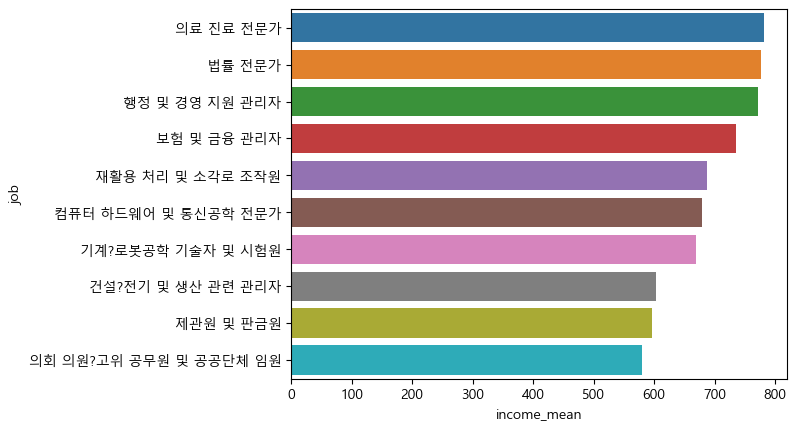

In [98]:
# barplot
import matplotlib as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(data = job_top10, y = 'job', x = 'income_mean')

# 실습) 남성 직업 빈도표 / 여성 직업 빈도표

 - (welfare_job) dataframe 사용
 - 1. 결측치 제거
 - 2. male(female)만 추출하고
 - 3. job으로 묶고
 - 4. job 빈도수 구하고
 - 5. 상위 10개만 출력

In [99]:
welfare_job_drop

,gender,birth,marriage,religion,income,code_job,code_region,job
2,male,1942,divorce,yes,107.0,762.0,1,전기공
3,male,1962,marriage,yes,192.0,855.0,1,금속기계 부품 조립원
7,female,1934,marriage,yes,27.0,941.0,1,청소원 및 환경미화원
8,female,1940,etc,yes,27.0,999.0,2,기타 서비스 관련 단순 종사자
14,male,1978,marriage,no,338.0,312.0,1,경영 관련 사무원
...,...,...,...,...,...,...,...,...
14401,male,1966,marriage,yes,280.0,874.0,6,물품 이동 장비 조작원
14402,female,1962,marriage,yes,209.0,930.0,6,제조 관련 단순 종사자
14405,female,1947,etc,no,27.0,941.0,6,청소원 및 환경미화원
14410,male,1956,marriage,yes,200.0,854.0,6,운송차량 및 기계 관련 조립원


In [100]:
welfare_job_drop.query('gender == "male"')

,gender,birth,marriage,religion,income,code_job,code_region,job
2,male,1942,divorce,yes,107.0,762.0,1,전기공
3,male,1962,marriage,yes,192.0,855.0,1,금속기계 부품 조립원
14,male,1978,marriage,no,338.0,312.0,1,경영 관련 사무원
26,male,1961,marriage,no,315.0,783.0,1,건축 마감 관련 기능 종사자
30,male,1992,not marriage,no,238.0,442.0,1,식음료 서비스 종사자
...,...,...,...,...,...,...,...,...
14360,male,1966,marriage,no,385.0,921.0,2,하역 및 적재 단순 종사자
14377,male,1969,marriage,yes,719.0,235.0,2,기계?로봇공학 기술자 및 시험원
14398,male,1956,divorce,yes,120.0,521.0,6,매장 판매 종사자
14401,male,1966,marriage,yes,280.0,874.0,6,물품 이동 장비 조작원


In [104]:
wel = welfare_job_drop.query('gender == "male"').groupby('job', as_index=False).agg(cnt = ('job', 'count'))

In [105]:
wel_top10 = wel.sort_values(by = 'cnt', ascending=False).head(10)

<Axes: xlabel='cnt', ylabel='job'>

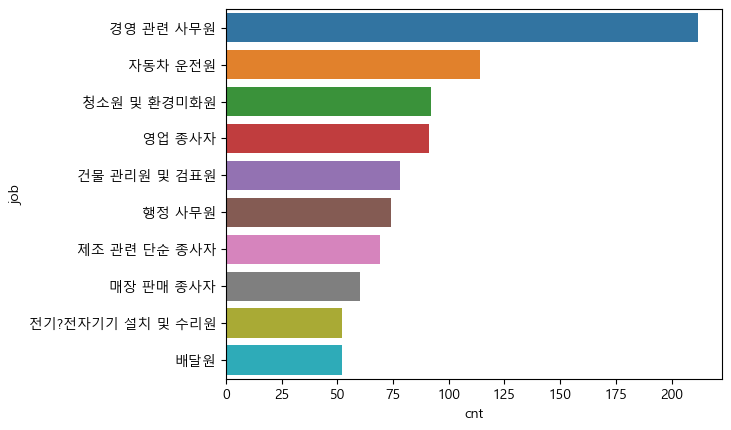

In [106]:
sns.barplot(data = wel_top10, x = 'cnt', y = 'job')

<Axes: xlabel='cnt', ylabel='job'>

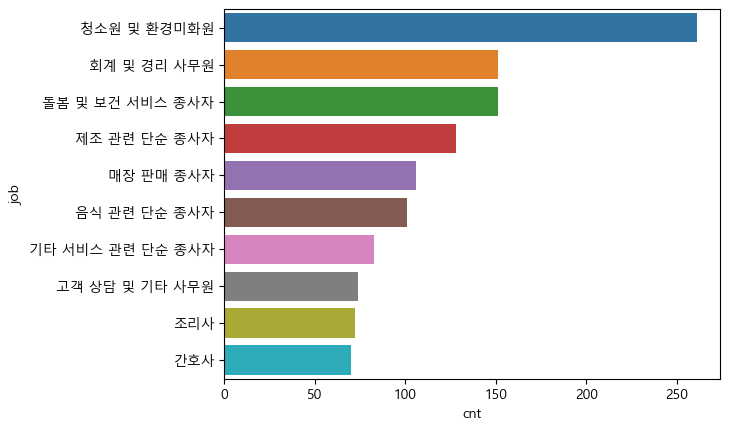

In [107]:
welfare_job_drop.query('gender == "female"')

wel_fe = welfare_job_drop.query('gender == "female"').groupby('job', as_index=False).agg(cnt = ('job', 'count'))

wel_fe_top10 = wel_fe.sort_values(by = 'cnt', ascending=False).head(10)

sns.barplot(data = wel_fe_top10, x = 'cnt', y = 'job')

In [112]:
welfare_job.query('job == "작물 재배 종사자"')

,gender,birth,marriage,religion,income,code_job,code_region,job
514,male,1947,marriage,yes,NaN,611.0,4,작물 재배 종사자
862,female,1964,marriage,no,NaN,611.0,7,작물 재배 종사자
863,male,1952,marriage,no,NaN,611.0,7,작물 재배 종사자
951,male,1947,marriage,yes,NaN,611.0,2,작물 재배 종사자
1578,male,1943,marriage,no,NaN,611.0,2,작물 재배 종사자
...,...,...,...,...,...,...,...,...
14394,male,1942,marriage,no,NaN,611.0,6,작물 재배 종사자
14395,female,1945,marriage,yes,NaN,611.0,6,작물 재배 종사자
14399,male,1941,marriage,no,NaN,611.0,6,작물 재배 종사자
14408,female,1936,marriage,no,NaN,611.0,6,작물 재배 종사자


In [114]:
wel_jak = welfare_job.query('job == "작물 재배 종사자"').query('income.isna()')

In [115]:
wel_jak['age'] = 2019 - wel_jak['birth']

In [116]:
wel_jak.groupby('gender').agg(age_mean = ('age', 'mean'))

,age_mean
gender,
female,70.846316
male,70.968944


# 인구 수 그래프

In [117]:
welfare_age

,gender,birth,marriage,religion,income,code_job,code_region,age
0,female,1945,etc,yes,NaN,NaN,1,74
1,male,1948,etc,no,NaN,NaN,1,71
2,male,1942,divorce,yes,107.0,762.0,1,77
3,male,1962,marriage,yes,192.0,855.0,1,57
4,female,1963,marriage,yes,NaN,NaN,1,56
...,...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5,52
14414,female,1992,not marriage,yes,NaN,NaN,5,27
14415,male,1995,not marriage,yes,NaN,910.0,5,24
14416,female,1998,not marriage,yes,200.0,246.0,5,21


In [120]:
# 나이별로 묶고 해당 나이의 빈도수
age_cnt = welfare_age.groupby('age', as_index=False).agg(cnt = ('age', 'count'))
age_cnt

,age,cnt
0,1,22
1,2,74
2,3,89
3,4,101
4,5,110
...,...,...
97,98,6
98,99,2
99,100,2
100,102,1


<Axes: xlabel='age', ylabel='cnt'>

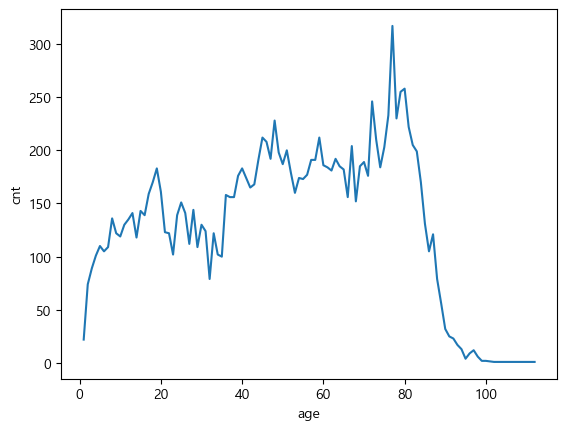

In [122]:
sns.lineplot(data = age_cnt, x = 'age', y = 'cnt')

In [123]:
# 성별, 나이 묶기
welfare_age.groupby(['age', 'gender']).agg(cnt = ('age', 'count'))

cnt
age gender     
1   female   12
    male     10
2   female   37
    male     37
3   female   38
...         ...
99  female    2
100 female    1
    male      1
102 male      1
112 female    1

[200 rows x 1 columns]

NameError: name 'wel_age' is not defined